<h1>Generation of synthetic data</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import *
from sklearn.model_selection import ParameterGrid

In [49]:
#Question 1
x = np.loadtxt("Noise.txt")

In [3]:
#Question 2
N = len(x)
Tmin = 1
Tmax = 1000

def Tfun(n):
    t = Tmin*np.exp(-(n-1)*np.log(Tmin/Tmax)/(N-1))
    return(t)

T = [Tfun(n+1) for n in range(N)]

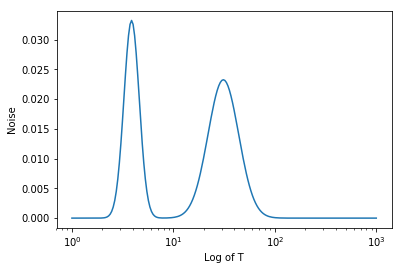

In [4]:
#Question3
fig = plt.figure()
plt.plot(T, x)
plt.xscale('log')
plt.xlabel('Log of T')
plt.ylabel('Noise')
plt.show()

In [5]:
#Question 4
M = 50
tmin = 0
tmax = 1.5

def tfun(m):
    t = tmin + (m-1)*(tmax-tmin)/(M-1)
    return(t)

t = [tfun(m+1) for m in range(M)]

In [6]:
#Question 5 
K = np.array([np.array([np.exp(-T[n]*t[m]) for n in range(N)]) for m in range(M)])

In [7]:
#Question 6
z = np.dot(K,x)
sig = 0.01 * z
y = np.dot(K,x) + random.gauss(0,np.dot(sig,sig)*np.ones(M))

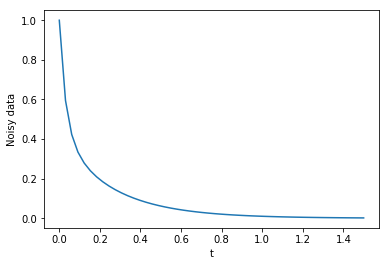

In [8]:
#Question 7
fig = plt.figure()
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('Noisy data')
plt.show()

<h1>Comparison of regularization strategies</h1>

In [9]:
#Question 1

Smoothness prior:
$g(x) = \frac{1}{2}\left \| D(x) \right \|^{2} = \frac{1}{2}\sum_{N}^{i=1}(x_{i}-x_{i-1})^{2}$
We take i and j in $\left \lfloor 1..N \right \rfloor$
$\frac{\partial g}{\partial x_{i}} = 2x_{i} - x_{i-1} - x_{i+1}$
$\frac{\partial^{2} g}{\partial^{2} x_{i}} = 2$ and $\frac{\partial^{2} g}{\partial x_{i}x_{j}} = -1$ if j is equal to i+1 or i-1, $\frac{\partial^{2} g}{\partial x_{i}x_{j}} = 0$ otherwise.
So the $\frac{\partial^{2} g}{\partial^{2} x_{i}} = 2$ > 0 and the function g is convex. So the problem has a solution which is unique

Smoothness prior + constraints : $g(x) = \frac{1}{2}\left \| D(x) \right \|^{2}+ \iota _{\left [ x_{min},x_{max} \right ]^{N}}(x)$, Thanks to the indicator function we will now have to minmise the smoothness prior function in ${\left [ x_{min},x_{max} \right ]^{N}}$ which is compact so the g function has a minimum which is unique and the problem 4 has a unique minimum

Sparsity prior : $g(x) = \left \|  x\right \|_{1}$, g is a norm so by defition g is convex so g and the problem have a minimum but it is not necessary unique.

In [10]:
#Question 2

To solve the problem 4 we can use the Forward-Backward optimization algorithm. We will have a first question equal to $\frac{1}{2}\left \|Kx-y  \right \|^{2}$ and $\beta g(x)$ the second function.

In [11]:
#Question 3
#We define the discrete gradient operator matrix
D = np.zeros((N,N))
D[0][0] = 1
D[0][-1] = -1
for i in range(N-1):
    D[i+1][i+1]=1
    D[i+1][i]= -1
D

array([[ 1.,  0.,  0., ...,  0.,  0., -1.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [40]:
gamma = 0.1
b = 0.1
lamb=0.1
Id = np.identity(N)

In [13]:
def proxOperator(x,f):
    return

In [14]:
def f(x):
    return(0.5*np.linalg.norm(np.dot(K,x)-y)**2)

In [15]:
def gSmooth(x):
    return(0.5*np.linalg.norm(np.dot(D,x))**2)

In [16]:
def gSparsity(x):
    return(np.linalg.norm(x,1))

In [54]:
#Prox operator for the f function
def proxOperator(x,b):
    return(np.dot(np.linalg.inv(Id+np.dot(K.T,K)*b*gamma),x+b*gamma*np.dot((K.T),y)))

In [18]:
def gradSmmoth():
    return

In [37]:
def gradSparsity(x):
    if(x<0):
        return(-1)
    elif (x>0):
        return(1)
    else:
        return(0)
    
def gradSparsityVector(x):
    return np.array([gradSparsity(i) for i in x])

In [32]:
x = np.array([1,5,0,-9])
grad = [gradSparsity(i) for i in x]
grad
gradSparsityVector(x)
0.1*x

array([ 0.1,  0.5,  0. , -0.9])

In [61]:
def forward_backward(grad,b):
    x = np.zeros(N)#Condition initial
    for i in range(1000): #On fait 100 itérations de l'algorithme
        y = x - 0.1*grad(x)
        x = x +lamb*(proxOperator(y,b)-x)
    return(x)

In [38]:
gradSparsityVector(x) * 0.1

array([ 0.1,  0.1,  0. , -0.1])

In [59]:
forward_backward(gradSparsityVector,b)

array([ 0.00735652,  0.00644533,  0.00550769,  0.00454315,  0.00355129,
        0.00253168,  0.00148394,  0.0004077 , -0.00069738, -0.00183161,
       -0.00299526, -0.00418858, -0.00541177, -0.006665  ,  0.01205161,
        0.01073798,  0.00939407,  0.00801991,  0.00661555,  0.00518113,
        0.0037168 ,  0.00222281,  0.00069944, -0.00085298, -0.00243403,
       -0.00404325, -0.00568012, -0.00734407,  0.01096556,  0.00924946,
        0.00750838,  0.00574313,  0.00395459,  0.00214366,  0.00031131,
       -0.00154144, -0.00341354, -0.00530389, -0.00721135,  0.01086524,
        0.00892709,  0.00697542,  0.00501147,  0.00303652,  0.00105185,
       -0.00094125, -0.00294149, -0.00494756, -0.00695816,  0.01102799,
        0.0090122 ,  0.00699574,  0.00497985,  0.0029658 ,  0.00095479,
       -0.00105197, -0.00305331, -0.00504808, -0.00703517, -0.00901349,
        0.00901801,  0.00706036,  0.00511453,  0.00318148,  0.00126213,
       -0.00064266, -0.00253204, -0.0044052 , -0.00626137, -0.00

In [22]:
#Question 4
def error(x1,x2):
    return((np.linalg.norm(x1-x2)/np.linalg.norm(x2))**2)

In [23]:
#Question 5
#We create a list of beta to test
B = np.sort(np.array([np.array(range(1,11))*10**-i for i in range(1,5)]).reshape((40,)))
B

array([1.e-04, 2.e-04, 3.e-04, 4.e-04, 5.e-04, 6.e-04, 7.e-04, 8.e-04,
       9.e-04, 1.e-03, 1.e-03, 2.e-03, 3.e-03, 4.e-03, 5.e-03, 6.e-03,
       7.e-03, 8.e-03, 9.e-03, 1.e-02, 1.e-02, 2.e-02, 3.e-02, 4.e-02,
       5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02, 1.e-01, 1.e-01, 2.e-01,
       3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01, 1.e+00])

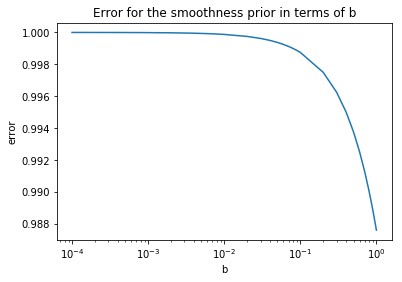

In [53]:
L = [error(f(x) + b*gSmooth(x),x) for b in B]
fig = plt.figure()
plt.plot(B, L)
plt.title('Error for the smoothness prior in terms of b')
plt.xlabel('b')
plt.xscale('log')
plt.ylabel('error')
plt.show()

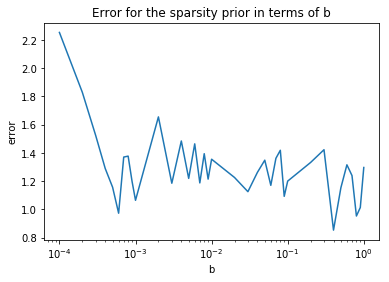

In [62]:
L = [error(forward_backward(gradSparsityVector,b),x) for b in B]
fig = plt.figure()
plt.plot(B, L)
plt.title('Error for the sparsity prior in terms of b')
plt.xlabel('b')
plt.xscale('log')
plt.ylabel('error')
plt.show()

<h1>Maximum entropy regularization</h1>

# Question 1:
ent is a convex function because ulogu is convex and the sum of convex functions is always convex. It is also proper because its effective domain is non-empty and it never attains minus infinity It is lower semicontinous beacuse it converges to the lower bound of 0. The function however is not differntiable at 0.



# Question 2:
The first term is convex and the entropy function is also convex. They are both proper and lower semicontinous, hence the function has a an optimal point, which may or maynot be unique. 

# Question 3:

$x \in \mathbb{R}$ , $prox_{\gamma \phi(x)} = argmin \frac{1}{2} ||x - z||^2 + \gamma z ln(z)$
$$\frac{z-x}{\gamma} + 1 + ln(z) = 0 $$
$$\frac{z}{\gamma} + ln(frac{z}{\gamma}) = \frac{x}{\gamma} - 1 - ln(\gamma)$$
$$\frac{z}{\gamma} e^{\frac{z}{\gamma}} = e^{\frac{x}{\gamma}} - 1 - ln(\gamma)$$
$$z = \gamma W(\frac{1}{\gamma}e^{(\frac{x}{\gamma}-1)})$$

In [40]:
#Proximity function of ent with Lambert function 
import scipy.special.lambertw as lambertw

def proxent(gamma,N, x):
    s = np.zeros(N)
    for i in range(N):
        v=np.zeros(N)
        v[i] = 1
        xs = x[i]
        u = xs/gamma -1 - log(gamma)
        if u >100:
            p =gamma*( u - log(u))
        elif u < -20:
            p = 0
        else:
            p = gamma * lambertw(u)
        q = p * v
        s = s + q
    return s


In [58]:
#Computing the gradient 
def gradient2(K,x, y):
    return np.dot(K.T,np.dot(K,x) - y)

In [59]:
#Forward Backward 
gam = 0.01
b=0.000001
l = b * gam
prox = lambda x : proxent(l, N, x)
grad = lambda x : gradient2(K,x,y)

In [60]:
def gradient_descent(init, steps,relax, grad, proj=lambda x: x):
    xs = init
    for step in steps:
        ys = xs - step * grad(xs)
        xs = xs + relax * (proj(ys) - xs) 
    return ys

In [61]:
x0 = np.random.sample(N)
xs = gradient_descent(x0,[gam]*10000,0.3,grad,prox)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


In [66]:
e = np.linalg.norm(xs - x)**2/np.linalg.norm(x)**2
e

0.13988208854843187

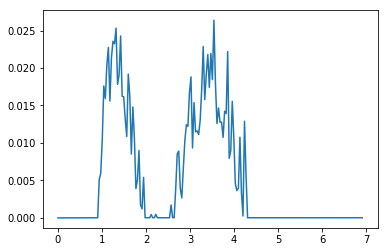

In [67]:
#Display the restored signal 
plt.plot(np.log(T), xs)

In [68]:
#Douglas Rachford 
Id = np.eye(N,N)

In [69]:
def prox_q(x,K,y,l):
    prox = np.dot(np.linalg.inv(Id+np.dot(K.T,K)*l),x+l*np.dot((K.T),y))
    return prox

def d_r(init, steps,relax, proj=lambda x: x, proj1 = lambda x: x):
   
    xs = init
    for step in steps:
        ys = proj(xs)
        zs = proj1(2*ys-xs)
        xs = xs + relax * (zs - ys) 
    return ys

In [70]:
gam = 0.01
b = 0.000001
l = gam * b
proxa = lambda x : prox_q(x,K,y,gam)
prox = lambda x : proxent(l,N,x)

In [71]:
xs = d_r(x0,[gam]*10000,0.3,prox, proxa)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


In [72]:
e = np.linalg.norm(xs - x)**2/np.linalg.norm(x)**2
e

0.36564536843956574

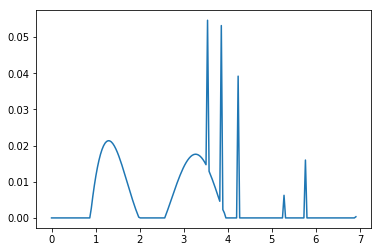

In [73]:
#Display the restored signal 
plt.plot(np.log(T), xs)

In [78]:
#Find the best beta
def calc_error2(b, gam, relax, K,x0,y):
    l = b* gam
    grad = lambda x : gradient2(K,x,y)
    proxa = lambda x : prox_q(x,K,y,gam)
    prox = lambda x : proxent(l,N,x)
    xsfw = gradient_descent(x0,[gam]*10000,relax,grad,prox)
    xsdr = d_r(x0,[gam]*10000,relax,prox, proxa)
    erfw = np.linalg.norm(xsfw - x)**2/np.linalg.norm(x)**2
    erdr = np.linalg.norm(xsdr - x)**2/np.linalg.norm(x)**2
    print('For beta ={0}'.format(b))
    print('The normalized quadratic error for FW is :{0}'.format(erfw))
    print('The normalized quadratic error for DR is :{0}'.format(erdr))
    return (erfw,erdr)

In [79]:
param_grid = {'b': [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]}
grid = ParameterGrid(param_grid)

for params in grid:
    calc_error2(params['b'],0.01,0.3, K, x0, y)

For beta =10
The normalized quadratic error for FW is :54.66885440747666
The normalized quadratic error for DR is :22.26605372856586


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


For beta =1
The normalized quadratic error for FW is :2.329708601591818
The normalized quadratic error for DR is :1.080341911000625
For beta =0.1
The normalized quadratic error for FW is :1.5604396723691443
The normalized quadratic error for DR is :8.00698826083912
For beta =0.01
The normalized quadratic error for FW is :1.699733511827753
The normalized quadratic error for DR is :21.088184696159765
For beta =0.001
The normalized quadratic error for FW is :0.26360461277791675
The normalized quadratic error for DR is :4.576313095208825
For beta =0.0001
The normalized quadratic error for FW is :0.1694298701782958
The normalized quadratic error for DR is :2.1137722389843074
For beta =1e-05
The normalized quadratic error for FW is :0.13880880162516815
The normalized quadratic error for DR is :0.39677942985269643
For beta =1e-06
The normalized quadratic error for FW is :0.13988208854843187
The normalized quadratic error for DR is :0.36564536843956574


# Question 6:
The best choice for beta is 𝛽=10−6

# Question 7:
The errors obtained using the maximum entropy regularization are lower than previous regularizations functions. 